In [3]:
!pip install kaggle
!pip install fastai
!pip install opendatasets

In [4]:
import opendatasets as od
import pandas
token = {"username":"nkkoraki","key":"1e6184fc9d3bbfea40161ce222deadee"}
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/")

Skipping, found downloaded files in ".\house-prices-advanced-regression-techniques" (use force=True to force download)


In [5]:
import pandas as pd
test_data = pd.read_csv(r"C:\Users\Z0rg3\PycharmProjects\Innopolis_Python_HW-1\Local_house_prices\house-prices-advanced-regression-techniques\test.csv")
train_data = pd.read_csv(r"C:\Users\Z0rg3\PycharmProjects\Innopolis_Python_HW-1\Local_house_prices\house-prices-advanced-regression-techniques\train.csv")


In [6]:
import fastai
from fastai.tabular.all import *


In [7]:
train_data = train_data.drop("Id",axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
print(train_data.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object


In [10]:
c = []
n = []
for i in train_data.columns:
        if (train_data[i].dtype) in ['object']:
            c.append(i)
stay = ["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","SalePrice"]

for i in train_data.columns:
    if i not in stay and i not in c:
      n.append(i)
print(train_data[c].info())
print(train_data[n].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [11]:
len(c),len(n)

(43, 31)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
train_data["OverallQual"]

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [14]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_data))

to = TabularPandas(train_data, procs=[Normalize,Categorify, FillMissing],
                   cat_names = c,
                   cont_names = n,
                   y_names='SalePrice',
                   y_block= RegressionBlock,
                   splits=splits)

to.xs.head()
dls = to.dataloaders(bs=64)
dls.show_batch()

c:\Users\Z0rg3\PycharmProjects\Innopolis_Python_HW-1\venv\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
c:\Users\Z0rg3\PycharmProjects\Innopolis_Python_HW-1\venv\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Mod,BrkSide,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,#na#,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,MnPrv,#na#,WD,Abnorml,False,False,False,51.000000,4712.000048,-0.000003,383.999997,-4.188475e-07,362.999994,746.999991,774.000017,455.999997,2.261014e-08,1229.999988,1.000000e+00,1.688106e-10,1.0,1.000000e+00,3.0,1.0,5.0,1.051193e-08,1946.000001,1.000000e+00,304.999995,0.000002,5.700000e+01,-8.787004e-07,4.780521e-08,6.300000e+01,-3.127120e-08,8.211429e-07,8.0,2006.0,121600.0
1,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,2fmCon,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,#na#,TA,Gd,BrkTil,TA,TA,No,ALQ,Rec,GasA,Gd,Y,SBrkr,TA,Typ,#na#,#na#,#na#,#na#,#na#,Y,#na#,#na#,#na#,WD,Normal,False,False,True,62.000000,10106.000002,-0.000003,351.000002,1.810000e+02,111.999989,643.999997,808.000009,547.000005,2.261014e-08,1355.000003,1.000000e+00,1.688106e-10,2.0,-1.286634e-08,4.0,2.0,6.0,1.051193e-08,1980.000000,-4.313171e-08,-0.000007,140.000001,3.144000e-07,-8.787004e-07,4.780521e-08,1.286760e-07,-3.127120e-08,8.211429e-07,9.0,2008.0,127500.0
2,RL,Pave,#na#,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,Hip,CompShg,Wd Sdng,Wd Sdng,#na#,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,True,False,False,68.500000,7252.000107,-0.000003,685.000012,-4.188475e-07,172.999989,858.000000,858.000009,0.000013,2.261014e-08,858.000024,1.000000e+00,1.688106e-10,1.0,-1.286634e-08,2.0,1.0,5.0,1.051193e-08,1983.000000,2.000000e+00,576.000003,119.999999,3.144000e-07,-8.787004e-07,4.780521e-08,1.286760e-07,-3.127120e-08,8.211429e-07,4.0,2009.0,134900.0
3,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,108.000001,13417.999983,131.999999,-0.000012,-4.188475e-07,1117.000015,1116.999998,1132.000000,1320.000029,2.261014e-08,2451.999995,1.061604e-08,1.688106e-10,3.0,1.000000e+00,4.0,1.0,9.0,1.000000e+00,2004.000001,3.000000e+00,690.999997,113.000000,3.200000e+01,-8.787004e-07,4.780521e-08,1.286760e-07,-3.127120e-08,8.211429e-07,9.0,2006.0,309000.0
4,RL,Pave,#na#,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,HdBoard,#na#,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,Gd,Typ,#na#,Attchd,RFn,TA,Gd,Y,#na#,MnPrv,#na#,WD,Normal,True,False,False,68.500000,9179.999923,-0.000003,747.000011,9.300000e+01,0.000001,840.000009,883.999996,0.000013,2.261014e-08,883.999983,1.000000e+00,1.688106e-10,1.0,-1.286634e-08,2.0,1.0,5.0,1.051193e-08,1983.000000,2.000000e+00,504.000001,239.999997,3.144000e-07,-8.787004e-07,4.780521e-08,1.286760e-07,-3.127120e-08,8.211429e-07,12.0,2007.0,144000.0
5,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,SFoyer,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,Gd,PConc,TA,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Attchd,RFn,TA,TA,Y,#na#,MnPrv,#na#,WD,Abnorml,False,False,False,80.000000,8800.000010,156.000002,763.000003,-4.188475e-07,172.999989,936.000005,1053.999998,0.

SuggestedLRs(valley=0.005248074419796467)

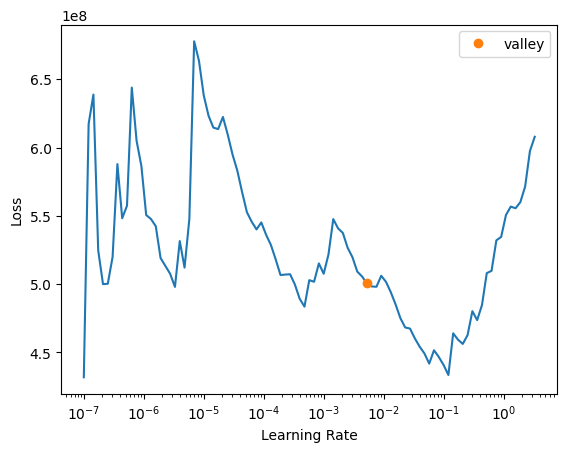

In [16]:
learn.lr_find()

In [18]:
learn = tabular_learner(dls, metrics=mae,lr= 0.005)
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,mae,time


In [19]:
learn.show_results()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_pred
0,4.0,2.0,0.0,4.0,4.0,1.0,5.0,1.0,12.0,3.0,3.0,1.0,3.0,2.0,2.0,7.0,7.0,0.0,4.0,5.0,3.0,3.0,4.0,3.0,2.0,6.0,2.0,5.0,2.0,5.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,8.0,1.0,1.0,1.0,2.0,-0.296167,0.007746,-0.581242,-0.542601,-0.290431,0.461208,-0.198646,-0.488259,-0.785451,-0.118988,-1.022158,-0.831543,-0.247102,-1.018546,-0.760550,0.175874,-0.192366,-0.916122,-0.954044,0.050199,-2.350899,-2.207484,-0.762829,-0.288890,-0.365965,-0.116404,-0.251138,-0.065035,-0.090612,0.985012,-0.603437,93500.0,-50.614372
1,4.0,2.0,0.0,4.0,4.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,9.0,9.0,0.0,4.0,5.0,1.0,4.0,4.0,4.0,3.0,6.0,2.0,1.0,2.0,5.0,4.0,7.0,5.0,2.0,2.0,3.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0,1.0,1.0,1.0,-0.900035,-0.296340,-0.581242,0.911635,-0.290431,-0.958869,-0.157853,-0.217133,-0.785451,-0.118988,-0.825183,1.095524,-0.247102,-1.018546,-0.760550,-1.039633,4.588138,-0.916122,2.167310,-1.669363,-1.023118,-1.252625,-0.762829,-0.642044,-0.365965,-0.116404,-0.251138,-0.065035,-0.090612,-1.984962,0.147964,118000.0,-31.141716
2,4.0,2.0,0.0,4.0,4.0,1.0,1.0,1.0,13.0,2.0,3.0,1.0,3.0,2.0,2.0,13.0,14.0,0.0,4.0,5.0,2.0,4.0,4.0,4.0,2.0,4.0,2.0,5.0,2.0,5.0,4.0,7.0,0.0,6.0,3.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0,1.0,1.0,1.0,0.028992,-0.141156,-0.581242,0.160621,0.799352,-0.892660,-0.462603,-0.777812,-0.785451,-0.118988,-1.232520,1.095524,-0.247102,-1.018546,-0.760550,0.175874,-0.192366,-0.916122,-0.954044,-0.620850,0.304662,0.699012,-0.762829,-0.700903,-0.365965,-0.116404,-0.251138,-0.065035,-0.090612,0.242518,-1.354838,129900.0,-45.483829
3,4.0,2.0,0.0,4.0,4.0,1.0,1.0,1.0,17.0,3.0,3.0,1.0,6.0,2.0,2.0,13.0,14.0,3.0,4.0,5.0,3.0,1.0,2.0,1.0,6.0,6.0,2.0,1.0,2.0,5.0,3.0,7.0,0.0,2.0,2.0,5.0,5.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0,1.933499,0.520127,1.502712,-1.025070,-0.290431,1.573069,0.461247,0.235622,2.298843,-0.118988,2.079725,-0.831543,-0.247102,2.597448,1.217897,1.391381,-0.192366,1.522693,-0.954044,1.140652,1.632442,1.705106,1.162686,1.565168,-0.365965,-0.116404,-0.251138,-0.065035,-0.090612,0.985012,-1.354838,342643.0,238.261642
4,5.0,2.0,0.0,4.0,4.0,1.0,5.0,1.0,3.0,3.0,3.0,4.0,6.0,2.0,2.0,7.0,7.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,6.0,6.0,2.0,5.0,2.0,5.0,4.0,7.0,0.0,6.0,3.0,5.0,5.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-2.247125,-0.826549,0.218546,-1.025070,-0.290431,0.159841,-1.024112,-1.393769,0.753261,-0.118988,-0.394897,-0.831543,-0.247102,0.789451,1.217897,0.175874,-0.192366,-0.306418,-0.954044,0.511544,-1.023118,-0.903287,-0.762829,-0.700903,-0.365965,-0.116404,-0.251138,-0.065035,-0.090612,-0.499975,0.899365,112000.0,-55.767014
5,4.0,2.0,0.0,4.0,4.0,1.0,5.0,1.0,13.0,3.0,3.0,1.0,3.0,4.0,2.0,9.0,9.0,0.0,4.0,5.0,2.0,4.0,4.0,4.0,1.0,6.0,2.0,1.0,2.0,5.0,4.0,7.0,5.0,2.0,2.0,5.0,5.0,3.0,0.0,0.0,3.0,9.0,5.0,1.0,1.0,1.0,0.307701,-0.139309,-0.581242,0.481509,-0.290431,0.089066,0.490043,0.267210,-0.785451,-0.118988,-0.473305,1.095524,-0.247102,-1.018546,-0.760550,0.175874,-0.192366,-0.306418,0.606633,-0.872493,0.304662,-0.190637,-0.762829,-0.700903,-0.365965,-0.116404,4.997952,-0.065035,2.466486,1.727505,0.147964,163000.0,-0.047964
6,4.0,2.0,0.0,4.0,4.0,1.0,1.0,1.0,8.0,3.0,3.0,1.0,6.0,4.0,2.0,12.0,13.0,0.0,4.0,5.0,2.0,4.0,4.0,4.0,5